# Pertemuan 5 (Convolutional Neural Network)

### Mata Kuliah Pembelajaran Mendalam

## Latihan Membuat Model

### 1 - Import Library

In [ ]:
# Import Library yang digunakan
import matplotlib.pyplot as plt
import cv2
import numpy as np
from keras import layers, models
from keras.datasets import mnist

### 2 - Read and Split Dataset

Menggunakan dataset "MNIST" yang tersedia.

MNIST dataset adalah data besar berisi angka-angka tulisan tangan yang biasa digunakan untuk melatih berbagai sistem pemrosesan gambar.

Link dataset kaggle: https://www.kaggle.com/datasets/hojjatk/mnist-dataset

In [ ]:
# Load dataset and split data train and test
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


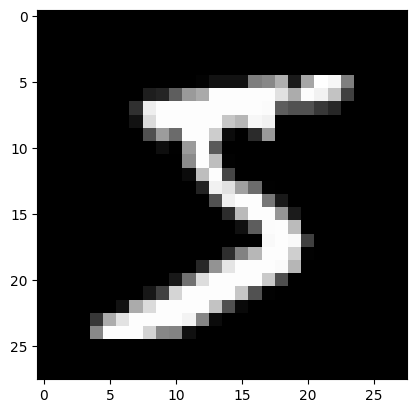

In [ ]:
# Read data
plt.imshow(x_train[0], cmap='gray')

### 3 - Preprocessing

In [ ]:
# Reshipe and Normalize data
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)
x_train = x_train/255
x_test = x_test/255

> x_train dan x_test direshape dengan ukuran 60000 data, ukuran 28x28 dan warna grayscale.

> x_train dan x_test dilakukan normalisasi.

In [ ]:
# Check Class Data
set(y_train.tolist())

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

Terlihat bahwa terdapat 10 kelas dataset yaitu angka 0 - 9.

### 4 - Pemodelan Menggunakan CNN

In [ ]:
# Create CNN Architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
]
)

In [ ]:
# Summary Data
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 64)                1

### 5 - Compile Model

In [ ]:
# Compile Model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### 6 - Training Model

In [ ]:
# Training Model
hasil = model.fit(x_train, y_train, epochs=10, batch_size=256, validation_split=0.2)

Epoch 1/10
188/188 [==============================] - 37s 190ms/step - loss: 0.3860 - accuracy: 0.8895 - val_loss: 0.1105 - val_accuracy: 0.9683
Epoch 2/10
188/188 [==============================] - 38s 201ms/step - loss: 0.0880 - accuracy: 0.9738 - val_loss: 0.0720 - val_accuracy: 0.9783
Epoch 3/10
188/188 [==============================] - 33s 176ms/step - loss: 0.0611 - accuracy: 0.9811 - val_loss: 0.0623 - val_accuracy: 0.9796
Epoch 4/10
188/188 [==============================] - 34s 181ms/step - loss: 0.0482 - accuracy: 0.9854 - val_loss: 0.0534 - val_accuracy: 0.9840
Epoch 5/10
188/188 [==============================] - 34s 179ms/step - loss: 0.0397 - accuracy: 0.9876 - val_loss: 0.0476 - val_accuracy: 0.9865
Epoch 6/10
188/188 [==============================] - 32s 169ms/step - loss: 0.0333 - accuracy: 0.9893 - val_loss: 0.0473 - val_accuracy: 0.9852
Epoch 7/10
188/188 [==============================] - 34s 182ms/step - loss: 0.0293 - accuracy: 0.9910 - val_loss: 0.0427 - val_ac

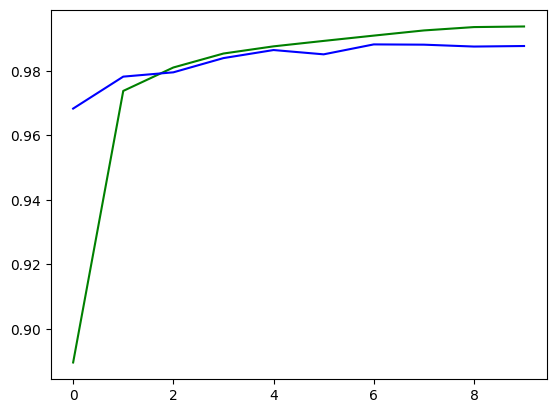

In [ ]:
# Evaluate using Matplotlib
y1 = hasil.history['accuracy']
y2 = hasil.history['val_accuracy']
plt.plot(range(len(y1)), y1, 'g',
         range(len(y2)), y2, 'b')

plt.show()

### 7 - Evaluasi Model

In [ ]:
# Test Accuracy model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test Accuracy = ", test_accuracy)

313/313 [==============================] - 2s 8ms/step - loss: 0.0338 - accuracy: 0.9890
Test Accuracy =  0.9890000224113464


### 8 - Prediksi

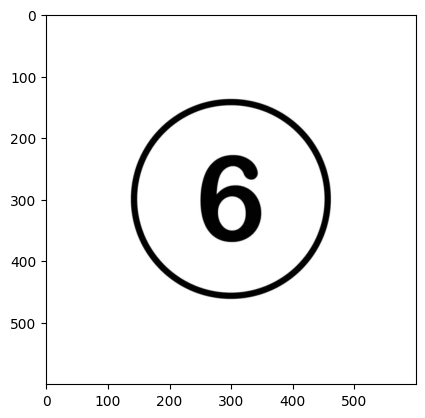

In [ ]:
# Upload test image
img = cv2.imread('angka enam.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap='gray')

In [ ]:
img.shape

(600, 600)

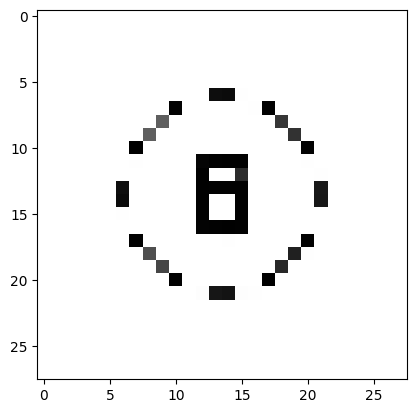

In [ ]:
img = cv2.resize(img, (28, 28))
plt.imshow(img, cmap='gray')

In [ ]:
img = img / 255
img = img.reshape((1, 28, 28, 1))
img.shape

(1, 28, 28, 1)

In [ ]:
pred = model.predict(img)
pred = np.argmax(pred)
print('Prediksi Gambar, Angka = ', pred)

1/1 [==============================] - 0s 456ms/step
Prediksi Gambar, Angka =  8
